<a href="https://colab.research.google.com/github/NataliiaHromyk/HomeWork_Python_DS/blob/main/Hromyk_%22HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



[process_bank_churn](https://github.com/NataliiaHromyk/HomeWork_Python_DS/blob/main/process_bank_churn.py)

In [27]:
!rm process_bank_churn.py

In [28]:
!wget https://raw.githubusercontent.com/NataliiaHromyk/HomeWork_Python_DS/refs/heads/main/process_bank_churn.py

--2025-07-15 19:46:41--  https://raw.githubusercontent.com/NataliiaHromyk/HomeWork_Python_DS/refs/heads/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4625 (4.5K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   4.52K  --.-KB/s    in 0s      

2025-07-15 19:46:41 (45.4 MB/s) - ‘process_bank_churn.py’ saved [4625/4625]



In [33]:
import importlib
import process_bank_churn
importlib.reload(process_bank_churn)

<module 'process_bank_churn' from '/content/process_bank_churn.py'>

In [34]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
import pandas as pd
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'
train_csv = data_dir + '/train.csv'
train_main_df = pd.read_csv(train_csv, index_col=0)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-3" (use force=True to force download)


In [35]:
import process_bank_churn as pr

data = pr.preprocess_data(train_main_df, scale_numeric=False)

In [36]:
?pr.preprocess_data

In [37]:
data['train_X'].head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3365,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
12236,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0


In [38]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier(random_state=42)

In [42]:
%%time
model.fit(X_train, train_targets)

CPU times: user 74 ms, sys: 547 µs, total: 74.6 ms
Wall time: 76.1 ms


DecisionTreeClassifier(random_state=42)

In [43]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Helper function for plotting ROC
def plot_roc(ax, X, y, title):
    pred = model.predict_proba(X)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y, pred)
    auc = metrics.roc_auc_score(y, pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)


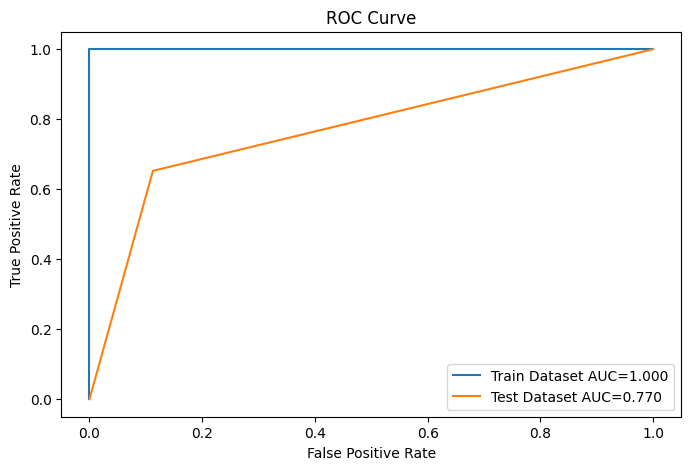

In [44]:
# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, train_targets, 'Train Dataset')
plot_roc(ax, X_val, val_targets, 'Test Dataset')


In [45]:
train_targets.value_counts() / len(train_targets)

,count
Exited,
0.0,0.7965
1.0,0.2035


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [48]:
accuracy_score(train_targets, train_preds), accuracy_score(val_targets, val_preds)

(1.0, 0.8396666666666667)

Оцінивши модель - ми чітко бачимо її перенавчання, що не є нормою. Модель добре вивчила треновані дані, а навчальні - ні. Якщо при звичному розкладі всьому таргету надати 0, то отримаємо точність моделі рівну 80%, завдяки моделі ми вгадуємо на 4% вище, тобто, всього 84%

In [49]:
#Глибина дерева
model.tree_.max_depth

26

Побудова дерева до глибини 2

In [50]:
from sklearn.tree import plot_tree, export_text

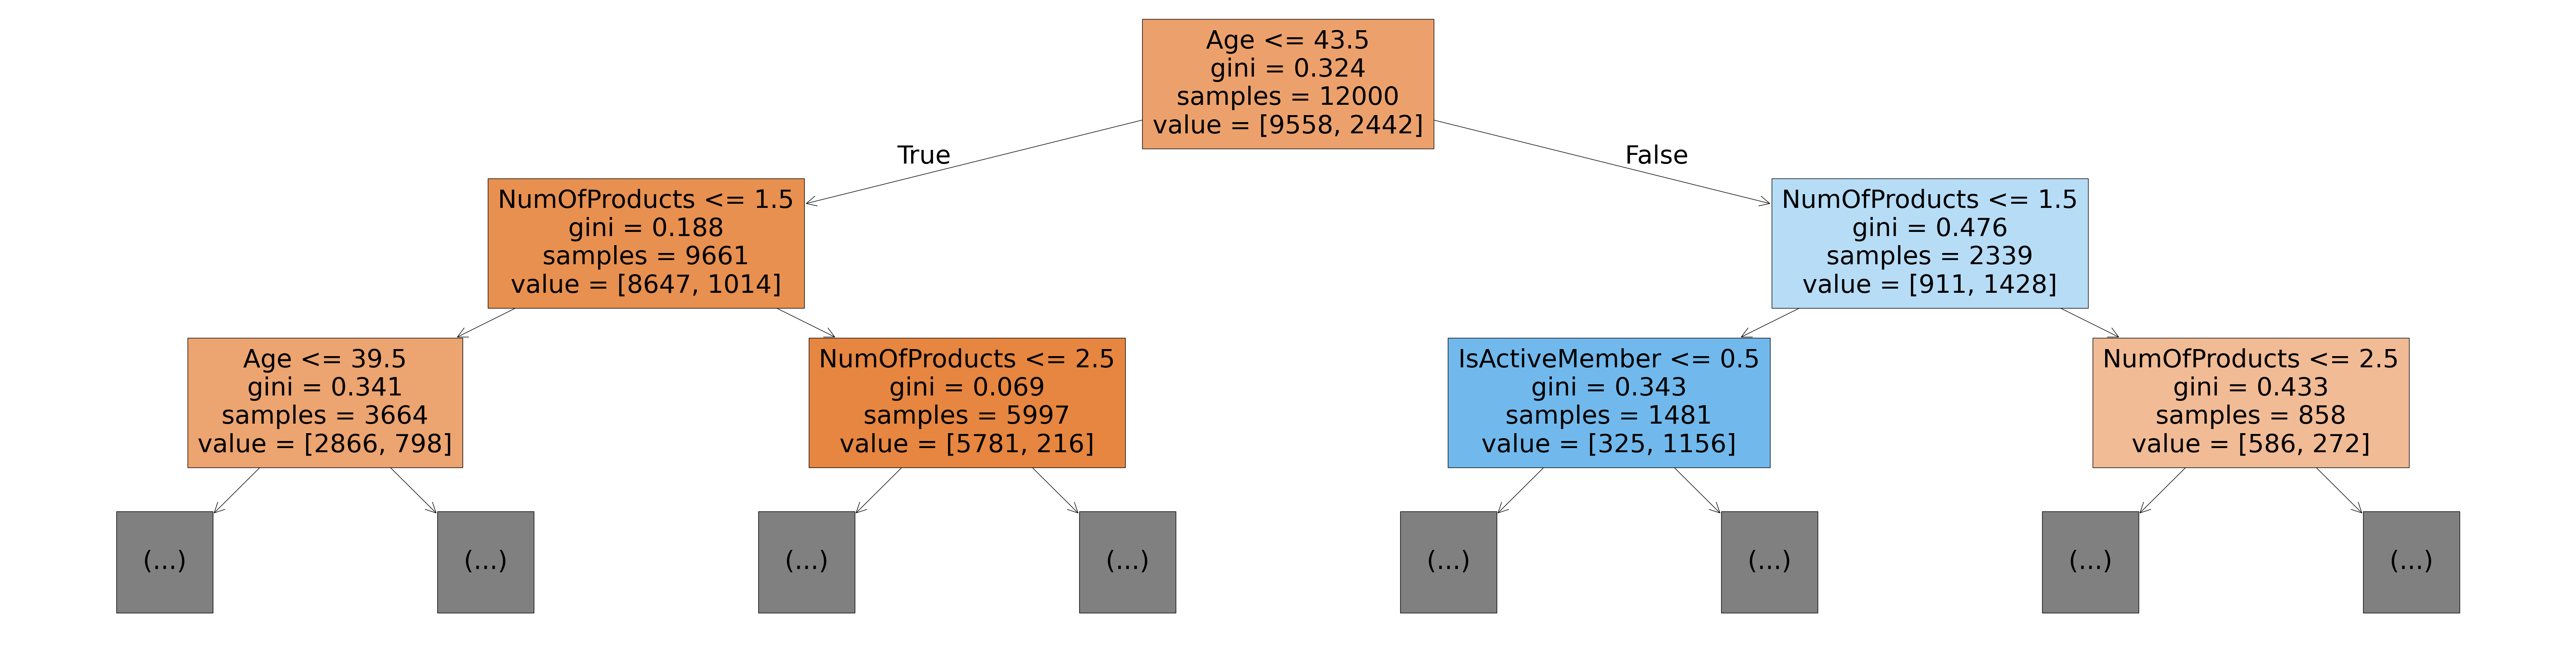

In [51]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [52]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- Age <= 39.50
|   |   |   |--- truncated branch of depth 24
|   |   |--- Age >  39.50
|   |   |   |--- truncated branch of depth 18
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 17
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1.0



Найвпливовішими ознаками у побудові дерева рішень являються Age та NumOfProducts

In [53]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [56]:
importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


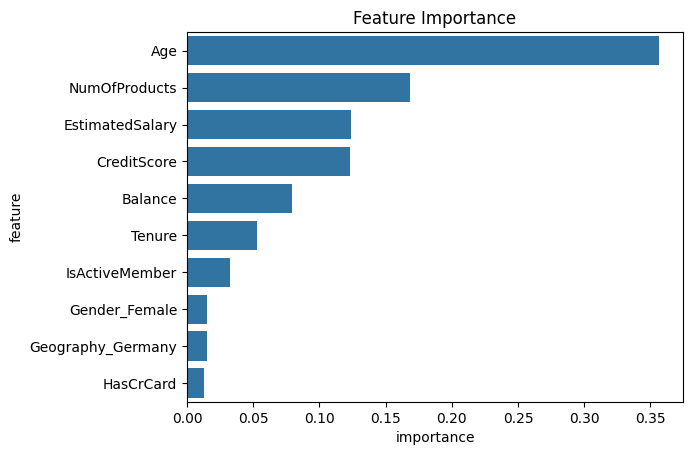

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

Обравши глибину рівну 6 вдається побудувати доволі хорошу модель дерева рішень. Показники точності та рок кривої являються доволі високими

Accuracy Train: 0.9040833333333333
Accuracy Val: 0.891


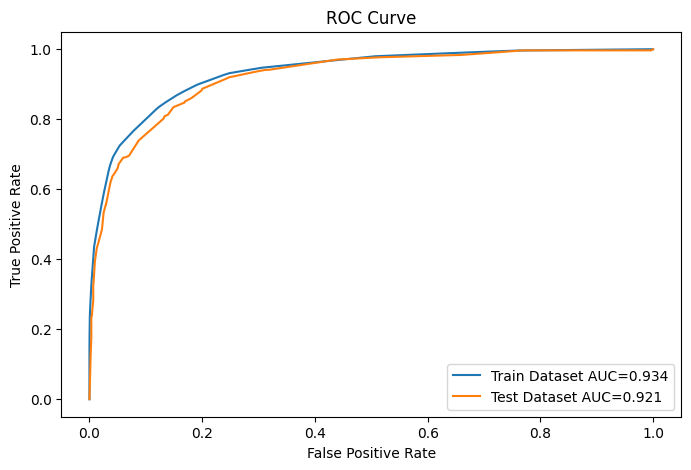

In [102]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, train_targets)

print("Accuracy Train:", model.score(X_train, train_targets))
print("Accuracy Val:",  model.score(X_val, val_targets))

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, train_targets, 'Train Dataset')
plot_roc(ax, X_val, val_targets, 'Test Dataset')


Accuracy Train: 0.9099166666666667
Accuracy Val: 0.8913333333333333


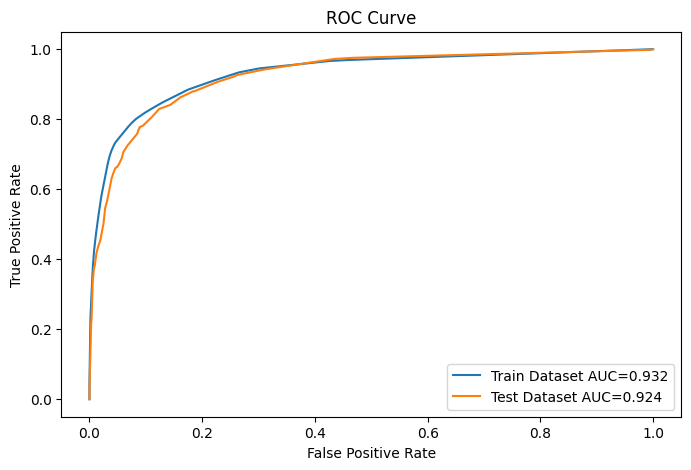

In [145]:
model = DecisionTreeClassifier(max_leaf_nodes=54, random_state=42)
model.fit(X_train, train_targets)

print("Accuracy Train:", model.score(X_train, train_targets))
print("Accuracy Val:",  model.score(X_val, val_targets))

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, train_targets, 'Train Dataset')
plot_roc(ax, X_val, val_targets, 'Test Dataset')


Accuracy Train: 0.89525
Accuracy Val: 0.8873333333333333


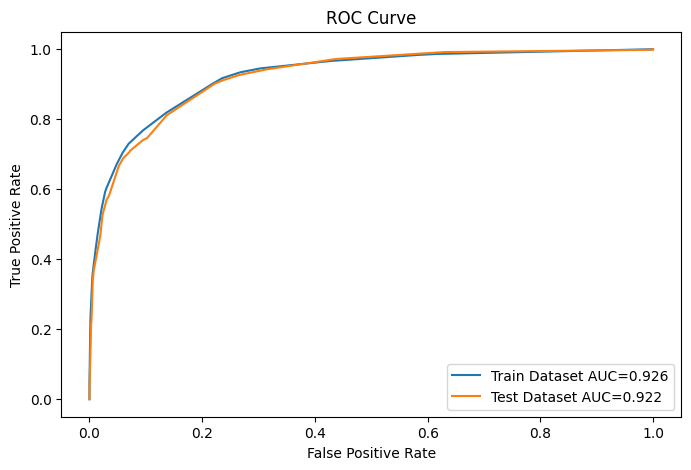

In [164]:
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=27, random_state=42)
model.fit(X_train, train_targets)

print("Accuracy Train:", model.score(X_train, train_targets))
print("Accuracy Val:",  model.score(X_val, val_targets))

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, train_targets, 'Train Dataset')
plot_roc(ax, X_val, val_targets, 'Test Dataset')


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [166]:
def auc(X, y):
    pred = model.predict_proba(X)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y, pred)
    auc = metrics.roc_auc_score(y, pred)
    return auc

In [177]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)

    train_pred = model.predict_proba(X_train)[:,1]
    train_auc = metrics.roc_auc_score(train_targets, train_pred)

    val_pred = model.predict_proba(X_val)[:,1]
    val_auc = metrics.roc_auc_score(val_targets, val_pred)

    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error, 'Train AUC': train_auc, 'Val AUC': val_auc}

In [178]:
%%time
stats_tree_max_depth = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 1.38 s, sys: 2.28 ms, total: 1.38 s
Wall time: 1.38 s


In [181]:
stats_tree_max_depth.style.background_gradient(subset='Val AUC', cmap='Blues')

,Max Depth,Training Error,Validation Error,Train AUC,Val AUC
0,1,0.160417,0.177333,0.744727,0.734865
1,2,0.134250,0.139000,0.842908,0.846496
2,3,0.118500,0.125333,0.897184,0.891146
3,4,0.112750,0.118000,0.911281,0.911264
4,5,0.104750,0.112667,0.925694,0.921927
5,6,0.095917,0.109000,0.933778,0.921111
6,7,0.092250,0.110333,0.941535,0.914449
7,8,0.081833,0.109667,0.949541,0.902790
8,9,0.073667,0.114667,0.959079,0.884709
9,10,0.064167,0.117333,0.969765,0.848436


In [191]:
def max_leaf_nodes_error(ml):
    model = DecisionTreeClassifier(max_leaf_nodes=ml, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)

    train_pred = model.predict_proba(X_train)[:,1]
    train_auc = metrics.roc_auc_score(train_targets, train_pred)

    val_pred = model.predict_proba(X_val)[:,1]
    val_auc = metrics.roc_auc_score(val_targets, val_pred)

    return {'Max Leaf': ml, 'Training Error': train_error, 'Validation Error': val_error, 'Train AUC': train_auc, 'Val AUC': val_auc}

In [196]:
%%time
stats_tree_max_leaf_nodes = pd.DataFrame([max_leaf_nodes_error(ml) for ml in range(2, 150)])

CPU times: user 8.13 s, sys: 20.4 ms, total: 8.15 s
Wall time: 8.22 s


In [197]:
stats_tree_max_leaf_nodes.style.background_gradient(subset='Val AUC', cmap='Blues')

,Max Leaf,Training Error,Validation Error,Train AUC,Val AUC
0,2,0.160417,0.177333,0.744727,0.734865
1,3,0.134250,0.139000,0.757345,0.751152
2,4,0.134250,0.139000,0.842908,0.846496
3,5,0.127167,0.135667,0.868674,0.859542
4,6,0.127167,0.135667,0.889387,0.881188
5,7,0.118500,0.125333,0.894222,0.887284
6,8,0.118500,0.125333,0.897184,0.891146
7,9,0.118500,0.125333,0.900114,0.898396
8,10,0.115083,0.121000,0.901475,0.900218
9,11,0.109500,0.113333,0.902443,0.901281


Накйращі показники при max_leaf_nodes = 36

Побудуємо ще цикл, де будемо перебирати два значення max_depth та max_leaf_nodes. Серед них визначатимемо найвищий показник

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

def tree_metrics(max_depth, max_leaf_nodes):
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes,
        random_state=42
    )
    model.fit(X_train, train_targets)

    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)

    train_pred = model.predict_proba(X_train)[:, 1]
    val_pred = model.predict_proba(X_val)[:, 1]

    train_auc = metrics.roc_auc_score(train_targets, train_pred)
    val_auc = metrics.roc_auc_score(val_targets, val_pred)

    return {
        'Max Depth': max_depth,
        'Max Leaf Nodes': max_leaf_nodes,
        'Training Error': train_error,
        'Validation Error': val_error,
        'Train AUC': train_auc,
        'Val AUC': val_auc
    }


results = []

for depth in range(1, 20):
    for leaf in range(2, 50):
        res = tree_metrics(depth, leaf)
        results.append(res)

# Створюємо датафрейм
stats_tree = pd.DataFrame(results)

In [199]:
stats_tree.loc[stats_tree['Val AUC'].idxmax()]

,381
Max Depth,8.000000
Max Leaf Nodes,47.000000
Training Error,0.091333
Validation Error,0.109333
Train AUC,0.930773
Val AUC,0.924913


Ми підібрали найбільш оптимальний варіант, але я вважаю обирати глибину рівну 8 і к-сть ліф нодів 47 - не дуже ок - виходить велике дерево. Теоретично ми можемо взяти глибину 5 чи ліф ноди 36 і в точності сильно не втратимо

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


Хочу натренувати найліпші показники, тому додатково буду використовувати Max Leaf Nodes

Accuracy Train: 0.9086666666666666
Accuracy Val: 0.8906666666666667


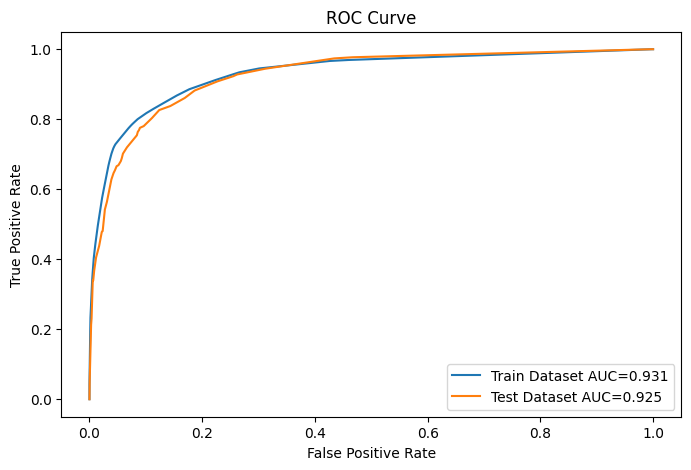

In [200]:
model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=47, random_state=42)
model.fit(X_train, train_targets)

print("Accuracy Train:", model.score(X_train, train_targets))
print("Accuracy Val:",  model.score(X_val, val_targets))

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train, train_targets, 'Train Dataset')
plot_roc(ax, X_val, val_targets, 'Test Dataset')


In [201]:
test_csv = data_dir + '/test.csv'
test_raw_df = pd.read_csv(test_csv)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [207]:
X_test, ids = pr.preprocess_new_data(
    new_df=test_raw_df,
    encoder=data['encoder'],
    scaler=data['scaler'],
    input_cols=data['input_cols'],
    numeric_cols=data['numeric_cols'],
    categorical_cols=data['categorical_cols']
)

In [214]:
preds = model.predict_proba(X_test)[:,1]

In [215]:
preds

array([0.17120623, 0.01437057, 0.01437057, ..., 0.01437057, 0.04173355,
       0.18959108])

In [216]:
sample_submission_csv = data_dir + '/sample_submission.csv'
sample_submission_df = pd.read_csv(sample_submission_csv)
sample_submission_df['Exited'] = preds
sample_submission_df

,id,Exited
0,15000,0.171206
1,15001,0.014371
2,15002,0.014371
3,15003,0.679612
4,15004,0.014371
...,...,...
9995,24995,0.014371
9996,24996,0.014371
9997,24997,0.014371
9998,24998,0.041734


In [217]:
sample_submission_df.to_csv("submission_log_reg.csv", index=False)

In [218]:
from google.colab import files
files.download("submission_log_reg.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

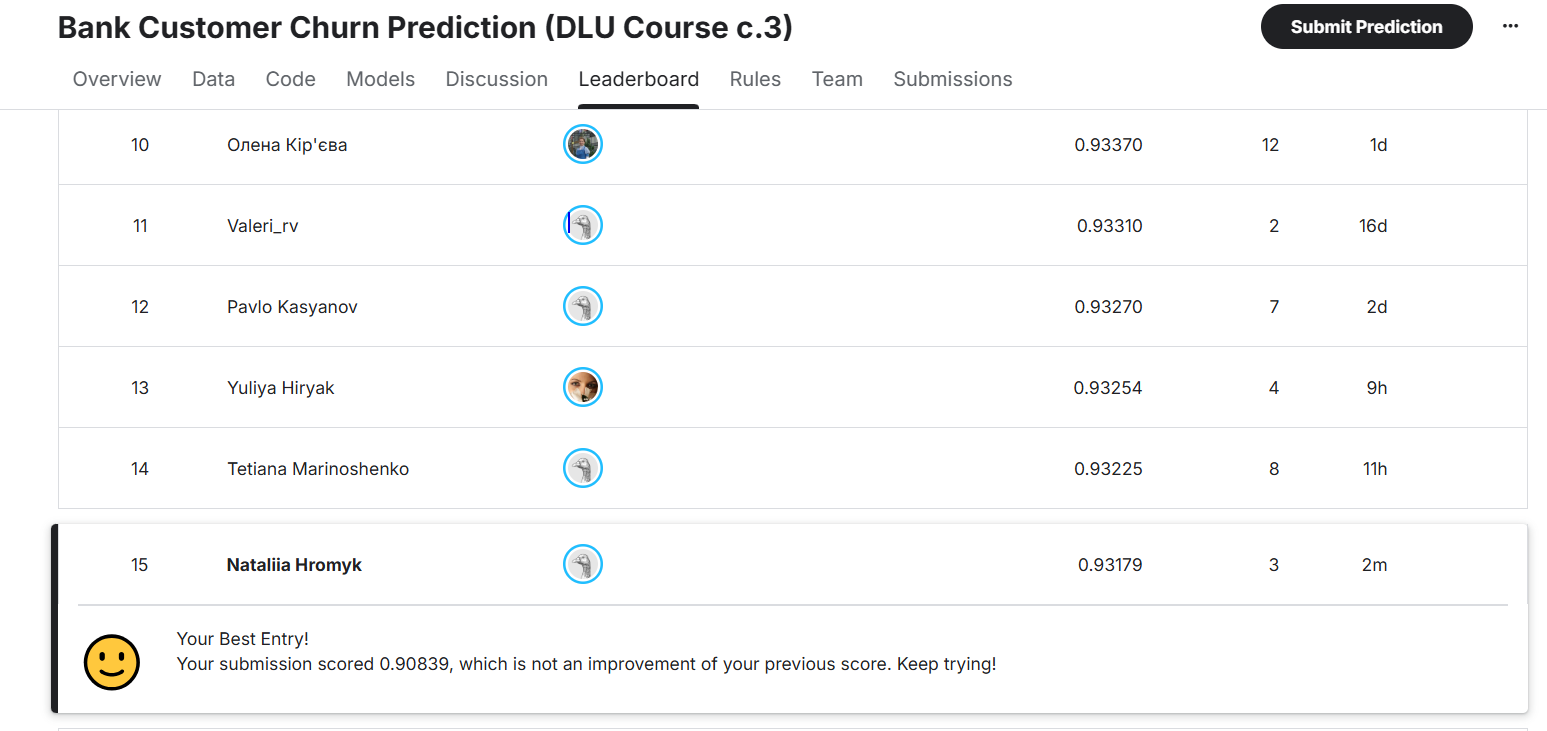